# Data Exploration Notebook

In [85]:
import pandas as pd
import glob
import os
from pathlib import Path, PureWindowsPath
import matplotlib
import cv2
%matplotlib inline

Data is in the data subdirectory with subdirectories for different runs of the training simulator

In [6]:
data_dir = 'data'

In [8]:
data_folders = glob.glob(os.path.join(data_dir, '*'))
data_folders

['data/driving_data_2', 'data/driving_data_1', 'data/driving_data_3']

Each folder contains a log and the associated images in the IMG folder

In [10]:
for folder in data_folders:
    files = glob.glob(os.path.join(folder, '*'))
    print(files)

['data/driving_data_2/driving_log.csv', 'data/driving_data_2/IMG']
['data/driving_data_1/driving_log.csv', 'data/driving_data_1/IMG']
['data/driving_data_3/driving_log.csv', 'data/driving_data_3/IMG']


# Explore Logs

Lets explore the logs by opening them and appending it all

In [80]:
for i in range(len(files)+1):
    folder_name = data_folders[i].split('/')[1]
    log_file = os.path.join(data_folders[i], 'driving_log.csv')
    data_file = pd.read_csv(log_file, names=['center_image', 'left_image', 'right_image', 'steering_angle', 'throttle', 'break', 'speed'])
    data_file['folder'] = folder_name
    if i == 0:
        merged_log = data_file
    else:
        merged_log.append(data_file)
    #print(data_file.head())
    #print(folder_name)
    #print(data_folders[i])

In [81]:
merged_log.head()

,center_image,left_image,right_image,steering_angle,throttle,break,speed,folder
0,C:\Users\Bopl\Desktop\driving_data\IMG\center_...,C:\Users\Bopl\Desktop\driving_data\IMG\left_20...,C:\Users\Bopl\Desktop\driving_data\IMG\right_2...,0.0,0.0,0,24.62923,driving_data_2
1,C:\Users\Bopl\Desktop\driving_data\IMG\center_...,C:\Users\Bopl\Desktop\driving_data\IMG\left_20...,C:\Users\Bopl\Desktop\driving_data\IMG\right_2...,0.0,0.0,0,24.43121,driving_data_2
2,C:\Users\Bopl\Desktop\driving_data\IMG\center_...,C:\Users\Bopl\Desktop\driving_data\IMG\left_20...,C:\Users\Bopl\Desktop\driving_data\IMG\right_2...,0.0,0.0,0,24.23477,driving_data_2
3,C:\Users\Bopl\Desktop\driving_data\IMG\center_...,C:\Users\Bopl\Desktop\driving_data\IMG\left_20...,C:\Users\Bopl\Desktop\driving_data\IMG\right_2...,0.0,0.0,0,24.08849,driving_data_2
4,C:\Users\Bopl\Desktop\driving_data\IMG\center_...,C:\Users\Bopl\Desktop\driving_data\IMG\left_20...,C:\Users\Bopl\Desktop\driving_data\IMG\right_2...,0.0,0.0,0,23.94309,driving_data_2


# Correcting Image Locations

The data was logged on a windows computer and hence the slashes and file path are wrong for model training on a linux machine

In [82]:
# need to correct for data_dir and 
def file_path_to_name(value):
    wind_path = PureWindowsPath(value)
    unix_path = Path(wind_path)
    return unix_path.name

In [83]:
# take the column and reduces it to the filename
for path in ['center_image', 'left_image', 'right_image']:
    merged_log[path] = merged_log[path].apply(file_path_to_name)

In [84]:
merged_log.head()

,center_image,left_image,right_image,steering_angle,throttle,break,speed,folder
0,center_2019_05_24_13_42_51_893.jpg,left_2019_05_24_13_42_51_893.jpg,right_2019_05_24_13_42_51_893.jpg,0.0,0.0,0,24.62923,driving_data_2
1,center_2019_05_24_13_42_51_970.jpg,left_2019_05_24_13_42_51_970.jpg,right_2019_05_24_13_42_51_970.jpg,0.0,0.0,0,24.43121,driving_data_2
2,center_2019_05_24_13_42_52_041.jpg,left_2019_05_24_13_42_52_041.jpg,right_2019_05_24_13_42_52_041.jpg,0.0,0.0,0,24.23477,driving_data_2
3,center_2019_05_24_13_42_52_111.jpg,left_2019_05_24_13_42_52_111.jpg,right_2019_05_24_13_42_52_111.jpg,0.0,0.0,0,24.08849,driving_data_2
4,center_2019_05_24_13_42_52_179.jpg,left_2019_05_24_13_42_52_179.jpg,right_2019_05_24_13_42_52_179.jpg,0.0,0.0,0,23.94309,driving_data_2


# Check out the steering angles and other numbers

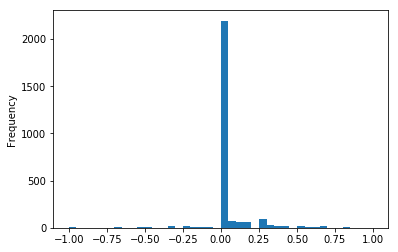

In [75]:
merged_log['steering_angle'].plot.hist(bins=40)

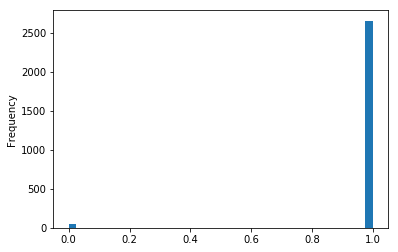

In [76]:
merged_log['throttle'].plot.hist(bins=40)

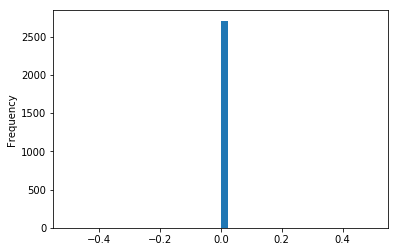

In [77]:
merged_log['break'].plot.hist(bins=40)

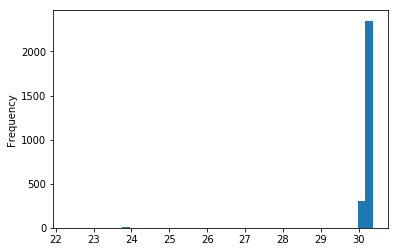

In [78]:
merged_log['speed'].plot.hist(bins=40)

# Visualise an image

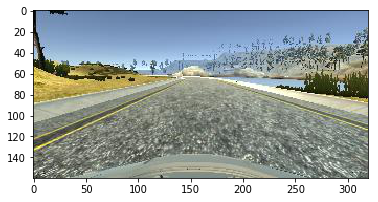

In [95]:
import matplotlib.pyplot as plt


for line in range(1):
    path = os.path.join('.', data_dir, merged_log['folder'][line], 'IMG', merged_log['center_image'][line])
    image = plt.imread(path)
    
    plt.imshow(image)